- 이전 장들에선 단어 주변의 문맥을 무시했음. 주어진 단어 앞/뒤에 있는 단어들 고려 X.
- ***단어모음 bag-of-words는 그냥 단순히 한 문서의 단어들을 bag에 뒤죽박죽 담아둔 것.***
- 이번엔 무작위 뭉치를 만들지 않고, **한 단어의 이웃 단어 몇 개**만으로 작은 단어 모음을 만들것.
    - 이렇게 하면 단어 벡터 훈련 과정이 문서 전체가 아닌 **서로 연관된 단어들에 집중**하게 됨.


<br>

- **단어 벡터(word vector)**? **단어의 의미(뜻)를 나타내는 수치 벡터.** 
    - 단어의 의미엔 **명시적인 의미** and **함축된(암묵적인) 의미**가 포함.
    - 단어 벡터를 이용해 그 단어가 속한 범주(인물, 장소, 사물 등...)도 잡아낼 수 있음.
    - 용어 빈도에 기초한 이전의 다른 표현들은 *정수로 이뤄진 희소 벡터였음. 정수 희소 벡터 (Integer Sparse Vector)*
    - 단어 벡터는 ***실수 밀집 벡터. (Float Dense Vector)***



# 의미 기반 질의 & 예시

<br>

- 간단한 예시를 보자.
- 어떤 유명인의 이름이 잘 생각나지 않아, 그 사람에 대한 일반적인 인상만으로 웹검색 시도? 마리퀴리 예시.
    > She invented something to do with physics in Europe in the early 20th century.
    
![image.png](attachment:image.png)

(진짜 뜨긴 한다...)

- 단어 벡터를 이용하면 woman, Europe, physics, scientist, famous와 같은 단어들의 의미를 모두 결합한 단어나 이름을 찾을 수 있음.
    - 위 질의문으로부터 Marie Curie라는 토큰에 좀 더 가까이 접근할 수 있음.
- **단어 벡터들이 맞춰져 있다면**, 검색을 위해 해야 할 일은 **결합하고자 하는 단어들의 단어 벡터를 모두 더하면 된다.**

```{.python}
answer_vector = wv['woman'] + wv['Europe'] + wv['physics'] + wv['scientist']
```
- 이런식으로.


## 비유 질문

<br>

- 어떤 인물의 이름을 다른 인물에 빗대어 질문하는 경우도 있음. 예시를 보자.
    > Who is the nuclear physics what Louis Pasteur is to germs?
    > (세균학의 파스퇴르에 비할 만한 핵물리학의 인물은?)
- 단어 벡터에선 Louis Pasteur에서 germs를 빼고 physics를 더하기만 하면 된다.
```{.python}
answer_vector = wv['Louis_Pasteur']  wv['germs'] + wv['physics']
```
- 이런식으로.
- 기억이 날 듯 말 듯한 상황(설단효과) 질문들은 모두 단어벡터로 해결할 수 있음.

# Word Vector with word2vec

<br>

https://wikidocs.net/22660 참고.

- Thomas Mikolov가 적당한 차원의 벡터로 단어의 의미를 부호화 하는 방법을 고안, 어떤 단어가 목표 단어 근처에 출현할 가능성을 예측하도록 모형 훈련.
- 이런 단어 벡터를 생성하는 소프트웨어를 공개, 이것이 바로 Word2Vec.

<br>

- word2vec은 분류명이 붙어있지 않은 문서들로 구성된 큰 말뭉치를 처리하는 것 만으로 단어들의 의미를 학습.
    - 사람이 word2vec 어휘의 단어들에 일일이 라벨링을 할 필요가 없음.
    - 앞 비유에서, word2vec 알고리즘에게 마리 퀴리가 과학자이고, 축구가 스포츠의 한 종류다 라는걸 알려 줄 필요가 없음.
- word2vec은 이런 수많은 내용들을 단순히 텍스트를 읽어서 스스로 학습함.
    - 이때 필요한 것은 오직 마리 퀴리 라는 이름이 과학과 관련된 단어들 근처에 있는 문서들을 word2vec에게 제공하는 것 뿐.
- 일종의 **비지도 학습**. 분류되지 않은 비구조적인 자료가 훨씬 많은 NLP 분야에선 비지도 학습 알고리즘이 제격.


- word2vec에서 신경망 훈련의 목표? 신경망이 **대상 단어의 의미를 직접 배우는 것이 아닌, 문장 안에서 대상 단어 근처의 단어들을 예측하게 만드는 것.**
    - **예측하고자 하는 이웃 단어 == 분류명** 이 되는 셈.
    - 이런 분류명은 사람이 미리 지정해 준 것이 아닌, **모형이 자료 집합 자체에서 가져온 것**. 비지도 학습.
        - ***time series modeling에서도 비지도 학습법이 사용됨.***
        - 주어진 시계열의 일정 구간의 이전 값들에 기초해 그 다음 값들을 예측하도록 훈련됨.
        - 여러 면에서 NLP문제와 많이 비슷. 왜? **어떤 값(단어와 수치)들의 순차열을 다루기 때문.**
- word2vec에서 이런 이웃 단어의 예측 자체가 중요한 것은 아님. 예측은 단지 목적을 위한 한 수단일 뿐.
    - 주의깊게 봐야 하는 것은 **예측을 위해 word2vec이 점진적으로 형성해나가는 벡터들.**
    - 이 표현은 대상 단어의 의미를 chapter 04.의 LSA(잠재 의미 분석)나 LDA(잠재 디리클레 할당)가 산출하는 단어-주제 벡터보다 더 많이 포착함.
    > **자동부호기 (자가부호기, Autoencoder)**를 한번 봐보세요.

<br>

- word2vec은 단어에 연관된 성질들도 학습함.
    - 말뭉치에 있는 임의의 단어가 장소성, 인물성, 개념성 같은 성질과 연관되어 있다면, **다른 모든 단어의 단어벡터에도 그 성질들에 관한 일정한 점수들이 부여됨.**
    - word2vec이 단어 벡터들을 형성(학습)함에 따라, **한 단어의 의미가 이웃 단어들로 번지게 되는 셈.**
    
<br>

- word2vec은 말뭉치의 모든 단어를 chapter 04.에서 논의한 **단어-주제 벡터와 비슷한 수치 벡터로 표현.** 하지만 **word2vec은 주제들이 좀 더 구체적임.**
    - LSA에선 ***단어들이 같은 문서에 있기만 하면 아무리 멀리 떨어져있어도 그 의미들이 번져서 단어-주제 벡터에 반영됐었음.***
    - 하지만 **word2vec은 의미가 번지기 위해선 단어들이 서로 근처에 있어야 함.**
        - 흔히 ***'같은 문장 안에서 다섯 단어 이내로'*** 처럼 조건을 걸어 둠.
        - 또한, word2vec의 단어 벡터는 벡터 연산의 의미가 있음. ***단어 벡터들을 더하고 빼면 원래 벡터들과는 다른 의미의 단어 벡터가 생성됨.***
- 단어 벡터를 **일단의 가중치들 (or 점수들)**이라고 생각할 수 있음. 
- **각 가중치 (or 점수)는 그 단어가 지닌 뜻의 특정 차원('성질')과 연관**됨.
- 예시 코드를 한번 보자.

In [4]:
from nlpia.book.examples.ch06_nessvectors import *
nessvector('Marie_Curie').round(2)

INFO:nlpia.loaders:Downloading word2vec
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.300d\.zip$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.27b\.zip$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.42b\.zip$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.6b\.zip$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.bin\.gz$, string=googlenews-vectors-negative300.bin.gz
DEBUG:nlpia.futil:regex pattern = ^[.]?([^.]*)\.([^.]{1,10})*\.tgz$, string=googlenews-vectors-negative300.bin.gz
INFO:nlpia.loaders:expanded+normalized file path: C:\ProgramData\Anaconda3\envs\WorkBase\lib\site-packages\nlpia\bigdata\googlenews-vectors-negative300.bin.gz
INFO:nlpia.loaders:requesting URL: https://www.dropbox.com/s/965dir4dje0hfi4/GoogleNews-vecto

placeness     -0.46
peopleness     0.35
animalness     0.17
conceptness   -0.32
femaleness     0.26
dtype: float64

    패키지 안에서 numpy import 안해서 에러를 낼까..

- 비유 질문 처럼, word2vec 개발자가 원한것은 **벡터 지향적 추론을 가능하게 하는 벡터 표현.**
- 단순히 컴퓨터에 적합한 수치들로 이뤄진 **단어 벡터들에 수학 계산을 적용**해, **얻은 수치들을 다시 사람이 이해할 수 있는 단어들로 환원**하는 것.
    - 단어 벡터들을 더하고 뺌으로서 그 벡터들이 나타내는 단어들에 관한 어떠한 추론을 수행할 수 있다.
    
```{.python}
wv['Timbers'] - wv['Portland'] + wv['Seattle'] = ?, ? = wv['Seattle_Sounders']
```
- 이런 식으로 **벡터를 통해 추론**을 수행하는 것.

## Vector-oriented reasoning (벡터 지향적 추론)

<br>

> 2013' **"Linguistic Regularities in Continuous Space Word Representations"(연속 공간 단어 표현들의 언어학적 규칙성)** 논문을 통해 word2vec이 처음 공개.

<br>

- 단어 벡터가 등장함에 따라, 앞 예시처럼 **주제를 묻는 문제를 벡터 연산으로 풀 수 있게 되었다.**
    
    > Portland Timbers + Seattle - Portland = ?

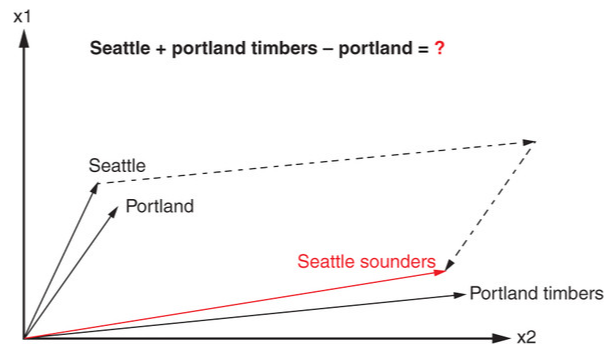

- word2vec 모형은 **단어들 사이 관계에 관한 정보**를 담고 있으며, 여기엔 **유사성에 관한 정보 또한 포함**된다.
    - Portland라는 용어와 Portland Timbers라는 용어가 Seattle과 Seattle Sounders만큼이나 가깝다는 점을 알고있다.
    - 서로 짝을 이룬 이 벡터들은 거리도 가깝고 방향도 거의 같음.
    - Portland 벡터와 Seattle 벡터의 차이를 Portland Timbers 벡터에 더하면 Seattle Sounders 벡터에 가까운 벡터가 나오게 된다.

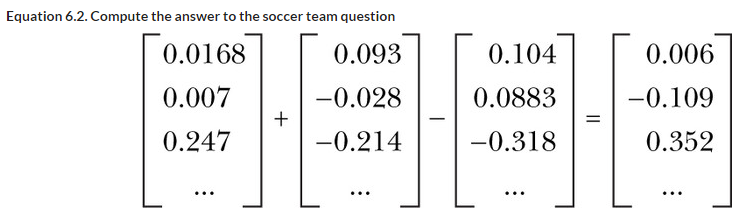

    이런식으로 계산이 이루어 질 것.
    
- **단어 벡터들을 더하고 빼고 나면 어휘의 단어 벡터 중 하나와 거의 같은 벡터가 나옴.**
    - 일반적으로 word2vec 모형의 단어 벡터들은 차원 수가 100 정도.
- 질문을 표현한 **벡터 연산의 결과는 어휘의 어떤 한 단어 벡터와 거의 비슷한 벡터.** 
- **그 벡터 근처에 있는 한 단어**가 바로 **스포츠팀과 도시에 관한 비유 질문 같은 NLP 질문에 대한 자연어 답.**

<br>

- 즉, word2vec을 이용해 **토큰 출현 횟수와 빈도들로 이뤄진 자연어 벡터**들을 그보다 **훨씬 낮은 차원의 벡터 공간으로 변환**할 수 있다.
- 이런 **저차원 공간에서 벡터들에 연산을 적용**해 새로운 벡터를 얻고, 그 벡터를 **다시 자연어 공간으로 변환**함으로써 자연어 추론 문제를 해결할 수 있다.

<br>

- word2vec 연구팀은 ***한 단어의 단수형과 복수형의 벡터 차이가 대부분의 단어에서 비슷하다***는 것을 발견했다.

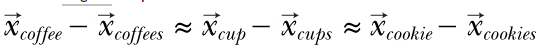

- 이런 유사성은 단수형-복수형에만 한정되지 않았고, 다른 여러 의미 관계에서도 나타났음.
    - 다음과 같은 캘리포니아주의 샌프란시스코에 해당하는 콜로라도주의 도시를 묻는 질문의 답을 단어 벡터 연산으로 구할 수 있음.
    > "San Francisco is to California as what is to Colorado?"  <br>
    > San Francisco - California + Colorado = Denver


### 단어 벡터를 사용해야 하는 이유?

<br>

- 단어 벡터는 자연어 벡터 공간의 형태로 모형화 하고자 하는 다른 모든 대상에 대해서도 유용함.
    - 단어 벡터를 2차원 의미 지도 형태로 시각화 할 수 있음.
    - 이런 case는 지리적 정확도 보단, 단어들의 장소와 단어 사이의 거리에 대한 나름의 느낌을 가지고 단어들을 배치. 의미론적 지도.
- 단어 벡터는 챗봇이나 검색엔진에도 대단히 유용. 패턴이나 키워드 부합의 과도한 깐깐함이나 허약함을 극복하는데 도움을 줌.
    - 예시를 들어보자.
    - 텍사스주 휴스턴시에 사는 사람에 관한 정보를 검색?
    - 근데 하필 그 사람이 댈러스로 이사를 한 후라면, 보통의 검색 엔진은 그 사람에 관한 정보를 찾지 못할 것.
    - 하지만 단어 벡터에 기초한 검색 엔진은 댈러스도 고려해서 검색을 수행할 수 있음.
    
    <br>
    
    - 또다른 예시?
    - 'tell me about a Denver omelette' vs. 'tell me about a Denver Nuggets'
    - 문자 기반 패턴에 의존하는 검색 엔진은 차이를 이해하지 못할 것.
    - 단어 벡터에 기초한 패턴 검색 알고리즘은 전자가 음식 이름, 후자가 프로 농구팀 이름임을 인지하고 알맞은 답을 사용자에게 제시할 수 있음.

## word2vec의 단어 표현 계산

<br>

- word2vec은 주어진 단어를 훈련용 말뭉치의 문맥 안에서의 그 단어의 의미를 말해주는 수치들로 구성된 단어 벡터로 표현.
- 일반적인 방식의 단어 의미 추론 문제를 단어 벡터들에 대한 연산으로 풀 수 있음. 
- 단어 벡터 계산 방법은 크게 2가지로 나뉜다.
    1. **skip-gram** : 주어진 목표 단어의 문맥을 이루는 주변 단어들을 예측. 한 단어가 입력, 주변 단어들이 출력.
    2. **continuous bag-of-words, CBOW** : skip-gram과 반대. 주어진 주변 단어들로부터 하나의 목표 단어를 예측.
- 단어 벡터 표현의 계산은 자원 소비가 심함. But, 대부분의 어플리케이션에 대비해 pre-trained된 단어 벡터 모형들이 이미 마련되어 있음. GloVe나 fastText같은거.

### CBOW (continuous bag-of-words, 연속단어모음)

<br>

- 주어진 주변 단어들에 기초해 중심 단어를 예측하는 방법.
- 훈련 샘플은 다수의 주변 단어들(multihot vector : 주변 단어들의 one-hot vector를 모두 합친 것)과 하나의 중심 단어로 구성.

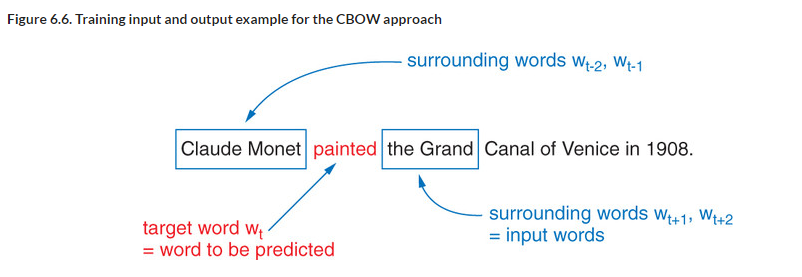

- 문서를 **토큰화**해서 얻은 **주변 단어 멀티핫 벡터**와 **목표 단어 원핫 벡터**의 **쌍들로 이뤄진 훈련 set으로 신경망을 훈련함.**
    - 목표 단어 $w_t$의 원핫 벡터를 신경망의 기대 출력으로 두고, 그 주변단어 $w_{t-2}$, $w_{t-1}$, $w_{t+1}$, $w_{t+2}$의 멀티핫 벡터를 입력으로 두고 신경망 순전파 단계 진행.
    - 출력층 노드는 **softmax 활성화 함수**를 통해 각 단어의 확률 계산, 확률이 가장 높은 단어의 원핫 벡터를 출력.

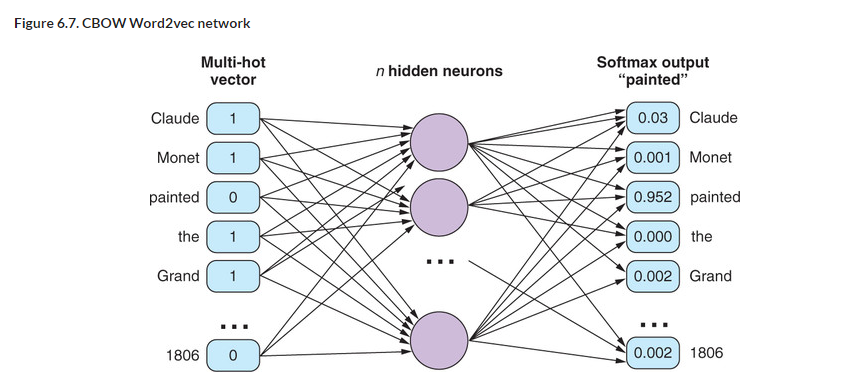

예문 : **"The fat cat sat on the mat"** 을 한번 생각해보자.  https://wikidocs.net/22660

<br>

- CBOW가 하는 일은 **The, fat, cat, on, the, mat (주변단어)** 을 통해 **sat (중심단어)** 을 **예측**하는 것.
- 중심단어 예측을 위해 **앞, 뒤로 몇 개의 단어를 볼 지 결정한 범위**를 **윈도우window** 라고 함. 
    - window 크기가 2이고, 예측하고자 하는 중심 단어가 sat이라고 한다면 앞의 두 단어인 fat-cat, 뒤의 두 단어인 on-the를 참고하는 것.
    - **window 크기가 n**이라고 한다면, 실제 중심 단어를 **예측하기 위해 참고하려고 하는 주변 단어의 개수는 2n**이 될 것.
- window를 크기를 정했다면, 이를 **계속 움직여 주변 단어와 중심 단어 선택을 바꿔가며 학습을 위한 데이터 셋을 만들 수 있음**. 이 방법을 **sliding window**라고 함.
    > 아래 그림이 slicing window를 이용해 데이터 셋을 만드는 과정.

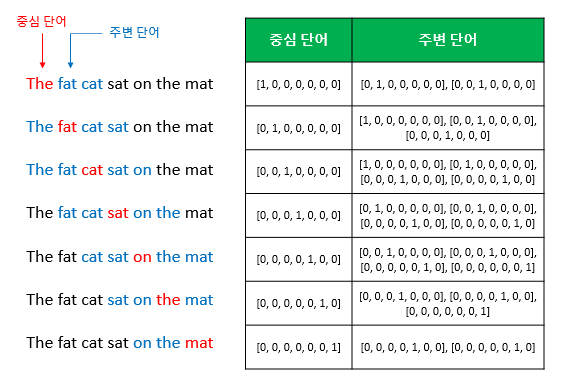

- Word2Vec에서 입력은 모두 one-hot vector여야 함.
- 우측 그림은 중심 단어와 주변 단어를 어떻게 선택했을 때에 따라 각각 어떤 one-hot vector가 생성되는지 보여줌.

<br>

- CBOW의 인공 신경망을 간단히 도식화하면 다음처럼 나타낼 수 있음.

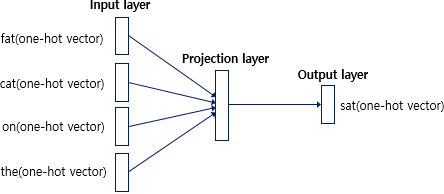

- Word2Vec은 DNN이 아님. 은닉층이 1개. 은닉층엔 활성화 함수도 없음.
- 은닉층이라기 보단 투사층(projection layer)이라 부름. look-up table이라는 연산을 담당.

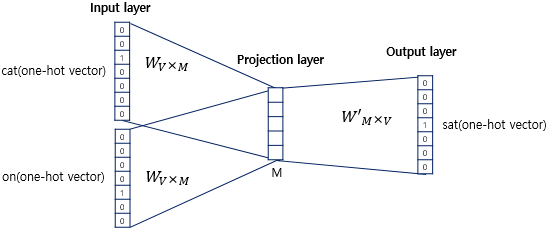 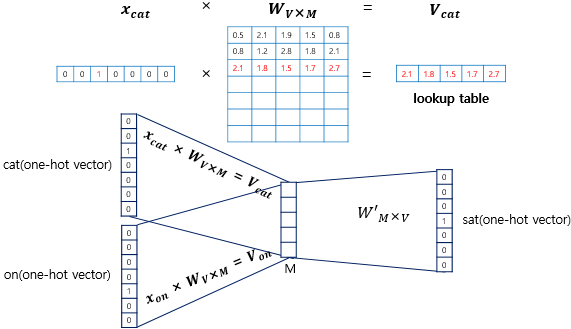

- 신경망을 좀 더 확대해보면 다음과 같은 구조.
- 투사층의 크기가 M. 이는 임베딩하고 난 벡터의 차원.
    - 임베딩 후 벡터의 차원. 위 그림에선 M=5이므로 각 단어의 임베딩 벡터의 차원은 5가 될것.
- 입력층과 투사층 사이 가중치 W는 $V * M$행렬, 투사층에서 출력층 사이의 가중치 W'는 $M * V$행렬. (V는 단어집합 크기)
    - 이 두 행렬은 동일한 행렬을 전치한 것이 아닌, 서로 다른 행렬.
    - CBOW는 W와 W'을 계속해서 학습해가는 구조.

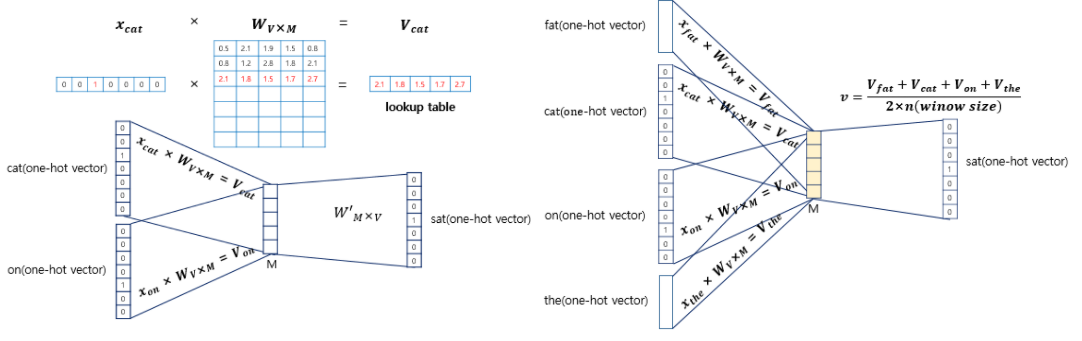

- 각 주변 단어의 one-hot vector x가 가중치 행렬 W와 곱해짐
- 사실상 **W행렬의 i번째 행을 그대로 읽어오는 것**과 동일. lookup table.
    - lookup해온 W의 각 row 벡터가 Word2Vec을 수행한 후의 각 단어의 M차원 크기를 갖는 임베딩 벡터.
- one-hot vector들에 대해 **가중치 W가 곱해져서 생긴 결과 벡터들은 투사층에서 만나 평균치를 계산**하게 됨.
    - skip-gram과는 다르게 투사층에서 벡터의 평균을 구함.
    - skip-gram은 입력이 중심 단어 하나이므로 평균 계산 X.

- 구해진 평균 벡터는 두번째 가중치행렬 W'와 곱연산.
- 결과는 one-hot vector들과 차원이 V로 동일한 벡터.
    - CBOW는 이 벡터에 **softmax함수**를 취함. 이렇게 나온 벡터를 **score vector**라고 함.
    - ***스코어 벡터의 j번째 index가 가진 0~1사이 값은 j번째 단어가 중심 단어일 확률***을 의미.
        - 이 스코어는 **우리가 실제로 값을 알고있는 중심 단어 one-hot vector값에 가까워져야 함.**
    - 두 벡터값의 오차를 줄이기 위해 CBOW는 손실함수를 cross-entropy를 사용.
    - 이 손실함수를 최소화하는 방향으로 역전파 수행, W와 W'을 학습하게 됨.

### Skip-Gram

<br>

- CBOW와는 다르게, **주어진 입력 단어에 기초**해 **일정 범위 이내의 주변 단어들을 예측**하도록 모형을 훈련.
- skip-gram? 중간에 빈자리가 있는 n-gram.  

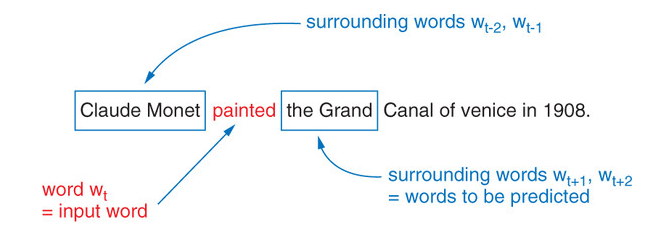

- 마찬가지로 입력층(M개)-은닉층(n개의 뉴런)-출력층(M개) 으로 이뤄진 신경망.
    - n은 단어 하나를 표현하는 벡터의 차원 수.
    - M은 모형의 어휘 크기(단어 개수).
    - 출력층의 활성화 함수는 분류 문제에 쓰이는 softmax 함수.

> skip-gram을 훈련하는 신경망 도식화

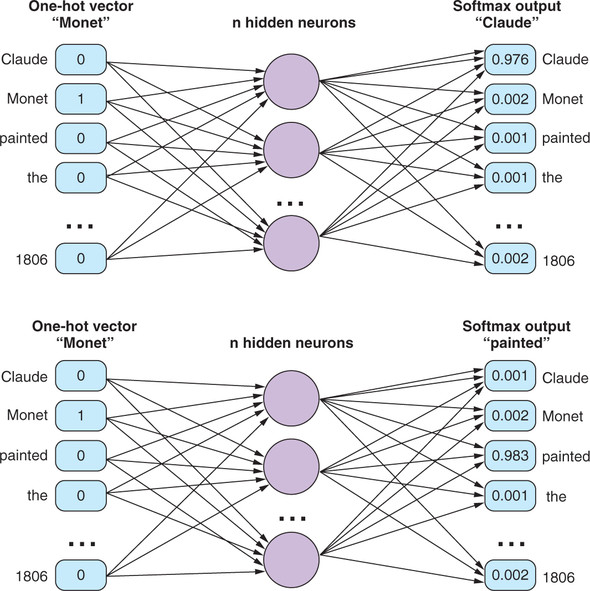

- skip-gram의 구간이 2인 경우엔 목표 단어를 포함한 5-gram으로 문장을 토큰화 해야 함.
- 문장 단어마다 하나의 5-gram이 만들어지므로, 10개의 단어로 이뤄진 문장은 10개의 5-gram으로 토큰화 된다.

> sentence = 'Claude Monet painted the Grand Canal of Venice in 1806.'

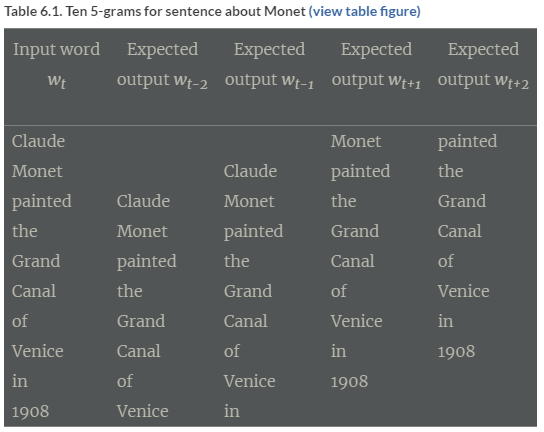

- 이런 입력 단어와 주변 단어들로 이뤄진 훈련 집합을 통해 신경망을 훈련.
    - **입력 단어와 주변 단어들은 one-hot vector 형태**로 입력. 출력 역시 one-hot vector.
    - 출력층의 노드들은 **softmax 함수**를 통해 **각 출력단어가 주어진 입력 단어 주변에 등장할 확률을 계산**.
    - 그 후, **주어진 입력 단어 주변에 등장할 확률이 가증 큰 단어에 해당하는 성분만 1이고 나머지 성분들은 0인 one-hot vector를 출력.**
    - one-hot vector와 손실함수를 계산한 후 역전파 진행, 학습.
- 가중치 행렬의 **각 행은 어휘의 각 단어 주변에 나타날 가능성이 큰 단어들을 의미.**
    - 즉, ***가중치 행렬의 각 행은 각 단어의 의미를 반영***하게 되는 셈.

<br>

- 훈련이 끝나게 되면, 우리에게 필요한건 입력층과 은닉층을 연결하는 가중치들.
- 입력 단어를 표현한 one-hot vector와 이 가중치 행렬을 곱한 것이 바로 단어 벡터 내장(word vector embedding).

- 은닉층의 가중치들은 보통 **행렬**로 표현.
    - **col은 각 입력 뉴런**에 대응, **row는 각 출력 뉴런**에 대응.
- 입력 벡터와 가중치 행렬을곱하게 되면, 은닉층의 출력벡터가 나옴.
- row 벡터 형태의 입력 one-hot vector에 훈련된 가중치 행렬을 곱하면 출력 row 벡터가 생성, 그 벡터의 각 성분은 row 벡터와 col벡터의 내적.
    - 그런데 **입력 벡터는 one-hot vector.** 
    - 곱셈은 결국 **one-hot vector의 1인 성분에 해당하는 행 하나를 가중치 행렬에서 선택**하는 것과 동일.
    - 그 행이 바로 해당 단어의 단어 벡터.
        - 행렬 곱셈 연산 없이, **어휘에서의 단어 번호를 index로 사용**해 **행렬의 한 행을 조회**해서 단어 벡터를 얻을 수 있음.

예문 : **"The fat cat sat on the mat"** 을 생각해보자.

<br>

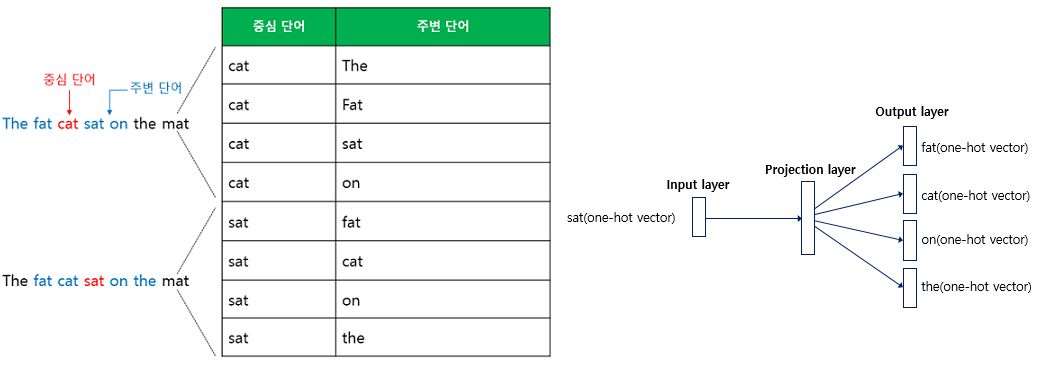

- 중심 단어에 대해 주변 단어를 예측하므로, 투사층에서 벡터들의 평균을 구하는 과정이 없음.
- 여러 논문에서 성능비교를 했을 때, Skip-gram이 CBOW보다 성능이 좋다고 알려저있음.

### Skip-gram vs. CBOW?

<br>

- **말 뭉치가 작을때, 자주 쓰이지 않는 단어들이 주어졌을 땐 Skip-gram**이 잘 작동.
- 신경망 구조 상, **같은 말뭉치라도 Skip-gram 방식이 훈련 샘플을 더 많이 얻을 수 있음**.
- **CBOW는 자주 쓰이는 단어들에 대해 정확도가 높고, 훈련이 빠름**.

<br>

- NNLM (Feed-forward NN Language Model)의 느린 학습속도와 정확도를 개선해 탄생한 것이 Word2Vec.
- NNLM에 있던 은닉층이 사라졌음.
- NNLM보다 빠른 이유? 추가적인 기법(계층적 소프트맥스, 네거티브 샘플링 등..)을 추가로 사용해서.

## gensim.word2vec 모듈 예제

<br>

- 별도의 구축 없이 pre-build된 모듈을 사용하면 됨.

### English example

<br>

- 영어로 된 corpus를 다운 받아 전처리 수행, 전처리 데이터를 바탕으로 Word2Vec 작업 진행.

In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\skdbs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [4]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml",
                           filename='ted_en-20160408.xml')

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x17f6be92860>)

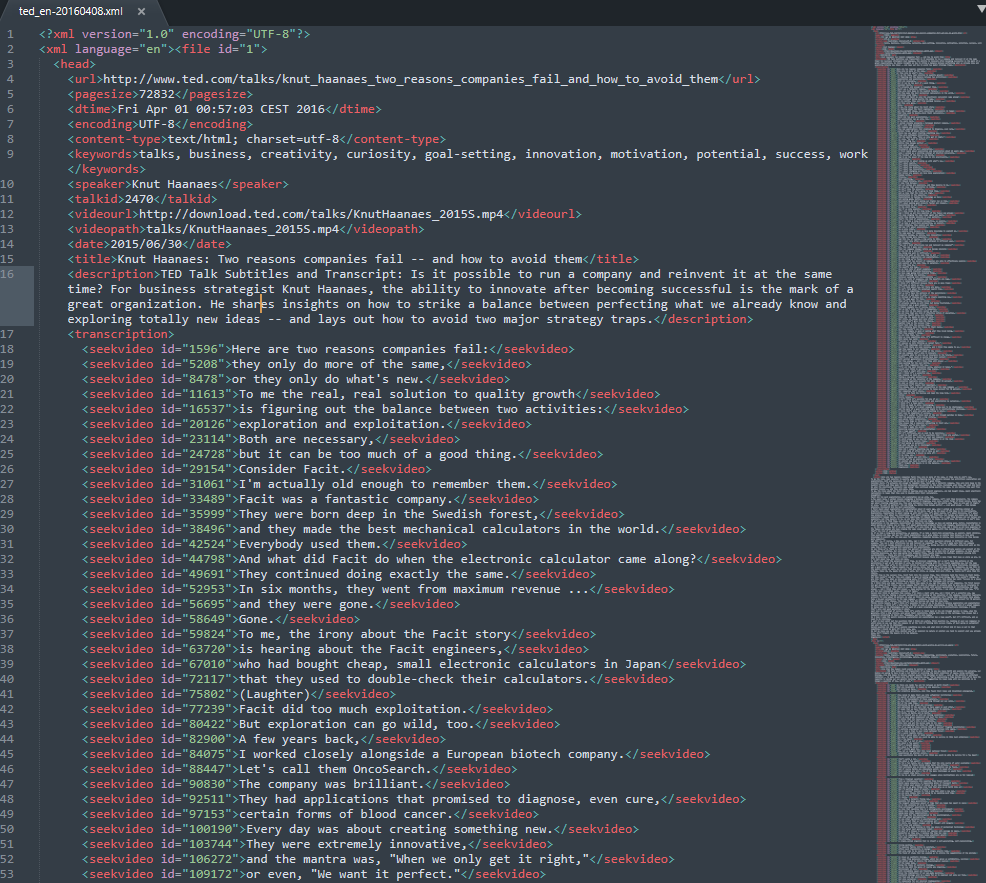

- 상당히 크다.
- 얻을 실제 데이터는 content block 사이의 내용.
- 전처리 작업을 통해 xml 문법들을 제거한 후 해당 데이터만 가져와야 한다.
    - 해당 block 사이에 (Laughter)나 (Applause)와 같은 배경음을 나타내는 단어도 등장. 제거해야 함.

In [3]:
# 어떻게 생겼는지 한번 봐보자.
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

In [4]:
# <content></content> 사이 내용만 추출
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub모듈을 통해, content 중간에 등장하는 (Audio) (Laughter) 등의 배경음 부분 제거.
# How? 이런 배경음은 괄호로 둘러쌓여 있음.
# regex를 통해 괄호부분을 제거하면 될 것.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

In [5]:
# content_text 출력해봤다가 커널 죽을뻔...

# 입력 corpus에 대해 NLTK를 통해 문장 토큰화 진행 (\n과 같은 부호 제거)
sent_text = sent_tokenize(content_text)

In [6]:
sent_text[:5]

["Here are two reasons companies fail: they only do more of the same, or they only do what's new.",
 'To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation.',
 'Both are necessary, but it can be too much of a good thing.',
 'Consider Facit.',
 "I'm actually old enough to remember them."]

In [7]:
# 각 문장의 구두점 제거, 대문자->소문자 변환
normalized_text = []
for string in sent_text:
    tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
    normalized_text.append(tokens)
normalized_text[:5]

['here are two reasons companies fail they only do more of the same or they only do what s new ',
 'to me the real real solution to quality growth is figuring out the balance between two activities exploration and exploitation ',
 'both are necessary but it can be too much of a good thing ',
 'consider facit ',
 'i m actually old enough to remember them ']

In [8]:
# 각 문장에 대해 NLTK를 통해 단어 토큰화 진행
result = [word_tokenize(sentence) for sentence in normalized_text]
result[:5]

[['here',
  'are',
  'two',
  'reasons',
  'companies',
  'fail',
  'they',
  'only',
  'do',
  'more',
  'of',
  'the',
  'same',
  'or',
  'they',
  'only',
  'do',
  'what',
  's',
  'new'],
 ['to',
  'me',
  'the',
  'real',
  'real',
  'solution',
  'to',
  'quality',
  'growth',
  'is',
  'figuring',
  'out',
  'the',
  'balance',
  'between',
  'two',
  'activities',
  'exploration',
  'and',
  'exploitation'],
 ['both',
  'are',
  'necessary',
  'but',
  'it',
  'can',
  'be',
  'too',
  'much',
  'of',
  'a',
  'good',
  'thing'],
 ['consider', 'facit'],
 ['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them']]

In [9]:
print('총 샘플 수 : {}'.format(len(result)))

총 샘플 수 : 273424


     상위 5개 문장만 봤더니 토큰화가 진행되었음. 
     Word2Vec모델에 텍스트 데이터를 훈련시켜 보자.

In [10]:
from gensim.models import Word2Vec
model = Word2Vec(
    sentences = result,
    vector_size = 100,
    window = 5,
    min_count = 5,
    workers = 4,
    sg = 0
)

    https://radimrehurek.com/gensim/models/word2vec.html (word2vec document)
    
    sentence : 토큰화가 진행 된 문장. iterable한 객체여야 함. (like list)
    vector_size (or size) : word vector의 특징 값. 임베딩 된 벡터의 차원.
    window : window 크기.
    min_count : 단어 최소 빈도 수 제한. 빈도가 적은 단어들은 학습 X.
    workers : 학습을 위한 프로세스 수.
    sg : 0은 CBOW, 1은 Skip-gram

- Word2Vec은 입력한 단어에 대해서 가장 유사한 단어들을 출력하는 model.wv.most_similar를 지원.
- 예시를 봐보자.

In [11]:
# 'man'과 유사한 단어들은 어떤 단어들일까
model_result_man = model.wv.most_similar('man')
model_result_man

[('woman', 0.8409290909767151),
 ('guy', 0.7949449419975281),
 ('boy', 0.7597222924232483),
 ('lady', 0.756590723991394),
 ('girl', 0.7404931783676147),
 ('soldier', 0.7110941410064697),
 ('kid', 0.7010035514831543),
 ('gentleman', 0.6992918848991394),
 ('photographer', 0.6551410555839539),
 ('friend', 0.6508245468139648)]

In [12]:
# 단어간 유사도를 이렇게도 계산할 수 있다.
model.wv.similarity('girl', 'lady')

0.8087556

    앞서 생성한 모델을 저장하고 다시 load해서 사용할 수도 있음.
    예시를 봐보자.

In [13]:
from gensim.models import KeyedVectors

model.wv.save_word2vec_format('eng_w2v') # 저장
loaded_model = KeyedVectors.load_word2vec_format('eng_w2v') # 로드

# 로드한 모델로 다시 man과 유사한 단어들을 출력해보자.
model_result2 = loaded_model.most_similar('man')
model_result2

[('woman', 0.8409290909767151),
 ('guy', 0.7949449419975281),
 ('boy', 0.7597222924232483),
 ('lady', 0.756590723991394),
 ('girl', 0.7404931783676147),
 ('soldier', 0.7110941410064697),
 ('kid', 0.7010035514831543),
 ('gentleman', 0.6992918848991394),
 ('photographer', 0.6551410555839539),
 ('friend', 0.6508245468139648)]

### Korean example

<br>

- 네이버 영화 리뷰 텍스트를 word2vec을 통해 유사도를 찾아보자.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt # 노트북으로 돌리기 전에 JPype issue 해결해두자.

%matplotlib inline
plt.style.use('ggplot')

In [23]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt",
                           filename='ratings.txt')

('ratings.txt', <http.client.HTTPMessage at 0x17f29dd60b8>)

In [15]:
# pd로 읽어와서 어떻게 생겼는지 한번 둘러보자.
train_data = pd.read_table('ratings.txt')
train_data

id                                           document  label
0        8112052                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ      1
1        8132799  디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...      1
2        4655635               폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.      1
3        9251303  와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...      1
4       10067386                        안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.      1
...          ...                                                ...    ...
199995   8963373                                     포켓 몬스터 짜가 ㅡㅡ;;      0
199996   3302770                                              쓰.레.기      0
199997   5458175                  완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.      0
199998   6908648                왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ      0
199999   8548411                                    포풍저그가나가신다영차영차영차      0

[200000 rows x 3 columns]

    20만개의 데이터.
    긍정 label은 1, 부정 label은 0 으로 라벨링 되어있음.
    
    이거로 감정분석 도 할수 있을듯?

In [16]:
# NULL값이 있는지 보자.
train_data.isnull().values.any()

True

In [17]:
# NULL이 존재하므로, 해당 row는 drop하자.
train_data = train_data.dropna(how='any')
print(train_data.isnull().values.any())
print(len(train_data)) # 8개의 row가 지워짐.

False
199992


In [18]:
# 정규 표현식을 이용해 한글 외 문자(이모지, 특수문자 등...) 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data

id                                           document  label
0        8112052                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ      1
1        8132799  디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...      1
2        4655635                   폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고      1
3        9251303   와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지      1
4       10067386                         안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화      1
...          ...                                                ...    ...
199995   8963373                                       포켓 몬스터 짜가 ㅡㅡ      0
199996   3302770                                                쓰레기      0
199997   5458175                    완전 사이코영화 마지막은 더욱더 이 영화의질을 떨어트린다      0
199998   6908648                왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ      0
199999   8548411                                    포풍저그가나가신다영차영차영차      0

[199992 rows x 3 columns]

    띄어쓰기가 왜 같이 지워졌을까
    reload하니 멀쩡히 나온다? why?

In [19]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘',
             '걍','과','도','를','으로','자','에','와','한','하다']

In [20]:
# 형태소 분석기 OKT를 사용한 토큰화 작업
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_x = okt.morphs(sentence, stem=True) # Tokenize
    temp_x = [word for word in temp_x if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_x)
tokenized_data[:3]

[['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ'],
 ['디자인',
  '을',
  '배우다',
  '학생',
  '외국',
  '디자이너',
  '그',
  '일군',
  '전통',
  '을',
  '통해',
  '발전',
  '문화',
  '산업',
  '부럽다',
  '사실',
  '우리나라',
  '에서도',
  '그',
  '어렵다',
  '시절',
  '끝',
  '까지',
  '열정',
  '을',
  '지키다',
  '노라노',
  '같다',
  '전통',
  '있다',
  '저',
  '같다',
  '사람',
  '꿈',
  '을',
  '꾸다',
  '이루다',
  '나가다',
  '수',
  '있다',
  '것',
  '감사하다'],
 ['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버리다', '하나', '없다', '최고']]

    23분이 말이야 방구야~~~

리뷰 최대 길이 :  72
리뷰 평균 길이 :  10.716703668146726


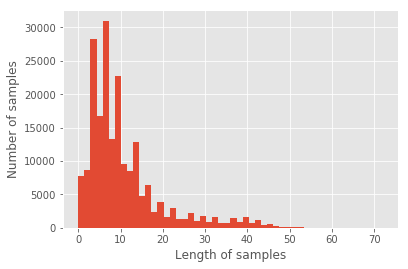

In [21]:
# 리뷰 길이의 분포 확인
print('리뷰 최대 길이 : ', max(len(l) for l in tokenized_data))
print('리뷰 평균 길이 : ', sum(map(len, tokenized_data)) / len(tokenized_data))

plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('Length of samples')
plt.ylabel('Number of samples')
plt.show()

In [22]:
# Word2Vec 모델 생성 및 train
model = Word2Vec(
    sentences = tokenized_data,
    vector_size = 100,
    window = 5,
    min_count = 5,
    workers = 4,
    sg = 0
)

In [23]:
# 완성된 임베딩 행렬 크기 확인
model.wv.vectors.shape

(16477, 100)

In [24]:
# 유사한 단어 찾기?
model.wv.most_similar('최민식')

[('한석규', 0.9060034155845642),
 ('설경구', 0.8664196729660034),
 ('안성기', 0.8619099855422974),
 ('송강호', 0.8599815368652344),
 ('이민호', 0.8571785688400269),
 ('최민수', 0.8568099141120911),
 ('이정재', 0.8557961583137512),
 ('박중훈', 0.8552220463752747),
 ('주진모', 0.8424971103668213),
 ('신들리다', 0.8329582214355469)]

In [25]:
model.wv.most_similar('히어로')

[('슬래셔', 0.8660660982131958),
 ('무협', 0.8644870519638062),
 ('물의', 0.8343547582626343),
 ('느와르', 0.8314697742462158),
 ('호러', 0.8218388557434082),
 ('블록버스터', 0.8107351064682007),
 ('물', 0.8018229603767395),
 ('무비', 0.8001894950866699),
 ('정통', 0.7899631261825562),
 ('교과서', 0.7871243357658386)]

In [32]:
myList = ['무협', '호러', '별로', '디즈니', '지브리', '픽사', '코미디']
for i in myList:
    print(f'{i} 와(과) 유사한 단어군 : ', model.wv.most_similar(i))
    print('\n')

무협 와(과) 유사한 단어군 :  [('느와르', 0.89044189453125), ('헐리웃', 0.8690123558044434), ('히어로', 0.8644871115684509), ('호러', 0.854100227355957), ('블록버스터', 0.8501418232917786), ('헐리우드', 0.8496137857437134), ('슬래셔', 0.8408166170120239), ('멜로', 0.8294681310653687), ('정통', 0.8276811838150024), ('홍콩', 0.8098841905593872)]


호러 와(과) 유사한 단어군 :  [('블록버스터', 0.8612661361694336), ('슬래셔', 0.8561460375785828), ('무협', 0.8541001677513123), ('느와르', 0.8498823046684265), ('정통', 0.8397655487060547), ('멜로', 0.8264029622077942), ('물이', 0.8226205110549927), ('하이', 0.8226197361946106), ('히어로', 0.8218387961387634), ('무비', 0.8126263618469238)]


별로 와(과) 유사한 단어군 :  [('별루', 0.6762019395828247), ('그닥', 0.6475585103034973), ('그다지', 0.5695385336875916), ('괜찮다', 0.553179144859314), ('글쎄', 0.5197231769561768), ('물론', 0.5165095925331116), ('기대다', 0.4963569641113281), ('흠', 0.4881467819213867), ('원래', 0.47775188088417053), ('아무튼', 0.47576904296875)]


디즈니 와(과) 유사한 단어군 :  [('픽사', 0.8451022505760193), ('드림웍스', 0.7981771230697632), ('

    이렇게 주어진 단어와 유사한 (거리가 가까운) 단어 벡터들을 알 수 있다.

    skip-gram은 어떤지 한번 봐보자.

In [33]:
model2 = Word2Vec(
    sentences = tokenized_data,
    vector_size = 100,
    window = 5,
    min_count = 5,
    workers = 4,
    sg = 1 # Skip-gram
)

In [34]:
myList = ['무협', '호러', '별로', '디즈니', '지브리', '픽사', '코미디']
for i in myList:
    print(f'{i} 와(과) 유사한 단어군 : ', model2.wv.most_similar(i))
    print('\n')

무협 와(과) 유사한 단어군 :  [('정통', 0.8087124228477478), ('첩보물', 0.805031955242157), ('느와르', 0.7961638569831848), ('홍콩', 0.7755975723266602), ('로멘틱', 0.773412823677063), ('첩보', 0.7697855234146118), ('블록버스터', 0.762965202331543), ('괴수', 0.7623383402824402), ('로맨스코미디', 0.7618304491043091), ('슬래셔', 0.7594425678253174)]


호러 와(과) 유사한 단어군 :  [('호러물', 0.8175033926963806), ('정통', 0.8057845830917358), ('느와르', 0.8003238439559937), ('컬트', 0.7994445562362671), ('오컬트', 0.7922318577766418), ('슬래셔', 0.7790156602859497), ('스릴러', 0.7788891792297363), ('공포물', 0.7763242125511169), ('극화', 0.7735763788223267), ('갱스터', 0.7721710205078125)]


별로 와(과) 유사한 단어군 :  [('별루', 0.8027937412261963), ('그닥', 0.7501113414764404), ('글쎄요', 0.6673200726509094), ('그다지', 0.6614004373550415), ('읍니', 0.655158519744873), ('루', 0.6368436217308044), ('디게', 0.6349795460700989), ('뮤지컬영화', 0.6310209631919861), ('글쎄', 0.6294248700141907), ('봣습니', 0.6277319192886353)]


디즈니 와(과) 유사한 단어군 :  [('픽사', 0.8727417588233948), ('드림웍스', 0.822509229183197

    확실히 좀 다르게 나온다.
    
    시각화는 아직 좀 이른것같다.

In [39]:
model.wv.save_word2vec_format('kor_w2v') # 모델 일단 저장

In [48]:
sentences = tokenized_data[:10]

# 단어벡터 재생성 - 기존 모델은 너무 많음. vector_size가 작아서...
model_vis = Word2Vec(
    sentences,
    vector_size = 300,
    window = 3,
    min_count = 1,
    workers = 4,
    sg = 0
)
word_vectors = model_vis.wv
# vocabs = word_vectors.vocab.keys() # deprecated
vocabs = list(word_vectors.index_to_key)
word_vectors_list = [word_vectors[v] for v in vocabs]

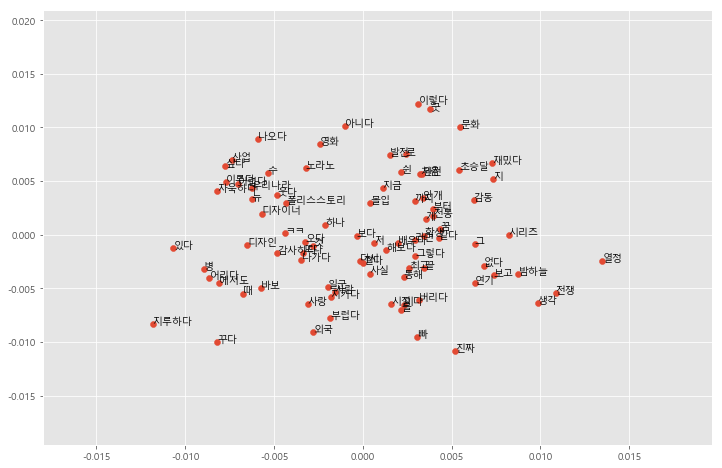

In [52]:
from sklearn.decomposition import PCA
import matplotlib as mpl

pca = PCA(n_components=2) # 2차원으로 축소
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

mpl.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 문제
plt.rcParams['font.family'] = 'Malgun Gothic' # 인코딩 문제

plt.figure(figsize=(12, 8))
plt.scatter(xs, ys, marker='o')
for i, v in enumerate(vocabs):
    plt.annotate(v, xy=(xs[i], ys[i]))